/tmp/ipykernel_585194/4107437817.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories_per_score = category_counts.groupby('score_range').apply(


<Figure size 1200x600 with 0 Axes>

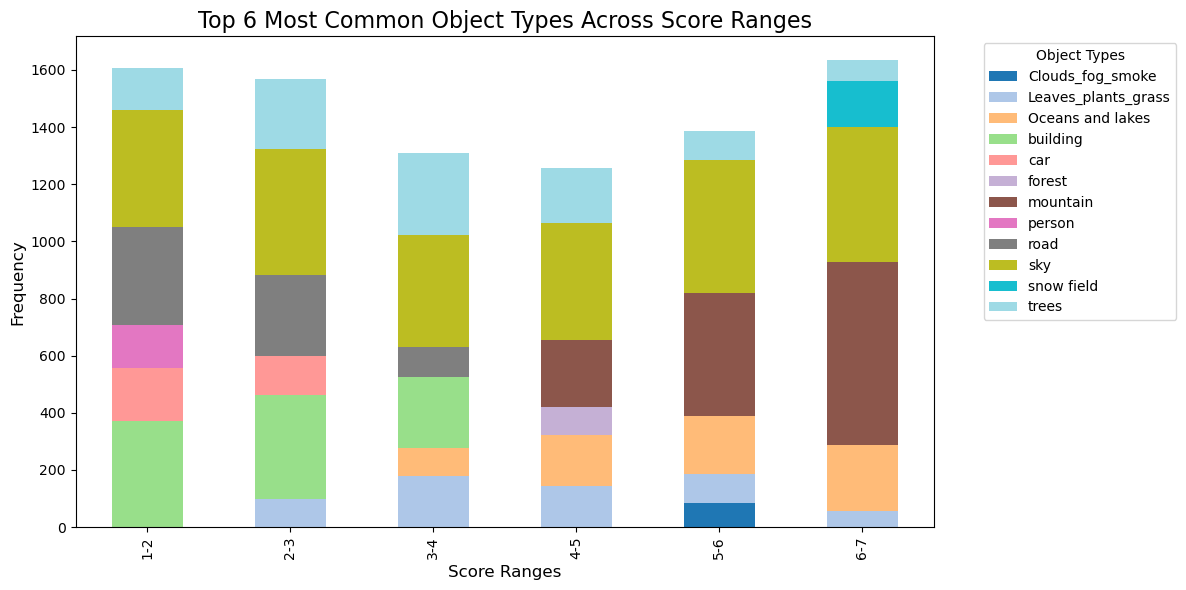

image has been saved to : /home/ubuntu/landscape-aesthetics/data/processed/landscape_ob/object_types_across_score_ranges2.png


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

file_location_path = Path.cwd()
project_base_path = file_location_path.parent.parent

csv_files = [
    'filtered_1_to_2.csv',
    'filtered_2_to_3.csv',
    'filtered_3_to_4.csv',
    'filtered_4_to_5.csv',
    'filtered_5_to_6.csv',
    'filtered_6_to_7.csv'
]

all_data = pd.DataFrame()

for file in csv_files:
    file_path = project_base_path / 'data' / 'processed' / 'landscape_ob' / file

    score_range = file.split('_')[1] + '-' + file.split('_')[3].split('.')[0]
   
    temp_data = pd.read_csv(file_path)
   
    temp_data['score_range'] = score_range
   
    all_data = pd.concat([all_data, temp_data], ignore_index=True)


all_data['object_types'] = all_data['type_summary'].str.split('; ')

expanded_data = all_data.explode('object_types')

category_counts = expanded_data.groupby(['score_range', 'object_types']).size().reset_index(name='frequency')

top_categories_per_score = category_counts.groupby('score_range').apply(
    lambda x: x.nlargest(6, 'frequency')).reset_index(drop=True)

pivot_data = top_categories_per_score.pivot(index='object_types', columns='score_range', values='frequency').fillna(0)

pivot_data = pivot_data.T

plt.figure(figsize=(12, 6))
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

plt.title('Top 6 Most Common Object Types Across Score Ranges', fontsize=16)
plt.xlabel('Score Ranges', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.legend(title='Object Types', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

output_file = project_base_path / 'data' / 'processed' / 'landscape_ob' / 'object_types_across_score_ranges2.png'

plt.savefig(output_file, dpi=300)

plt.show()

print(f"image has been saved to : {output_file}")
